In [1]:
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight','ggplot'])
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
df_data["MEDV"] = boston.target


In [5]:
all_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', "MEDV"]

In [6]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', "MEDV"]


In [8]:
X = df_data[feature_cols]
y = df_data["CHAS"]

In [9]:
from sklearn import tree, ensemble

In [10]:
np.random.seed(48)
clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=3))

In [11]:
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")

In [12]:
accuracy_results

array([0.79411765, 0.82178218, 0.93069307, 0.83168317, 0.93069307])

In [13]:
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  86.17938264414677 %


Why does feature selection/scaling doesn't affect the result here?

Scaling is not an issue to decision tree like it is to KNN and others. 

In [14]:
np.random.seed(48)
clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=10))

In [15]:
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")

In [16]:
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  78.4469035138808 %


In [17]:
import warnings
warnings.filterwarnings('ignore')
acc = []
for x in range(21):
    np.random.seed(48)
    clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=x))
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
    acc.append([x, 100 * np.mean(accuracy_results)])
    print(acc[x])

[0, nan]
[1, 87.14230246554067]
[2, 88.33042127742186]
[3, 86.17938264414677]
[4, 85.76975344593282]
[5, 85.57173364395263]
[6, 79.23315860997863]
[7, 77.2587847019996]
[8, 78.64492331586099]
[9, 78.64492331586099]
[10, 78.4469035138808]
[11, 78.4469035138808]
[12, 78.4469035138808]
[13, 78.4469035138808]
[14, 78.4469035138808]
[15, 78.4469035138808]
[16, 78.4469035138808]
[17, 78.4469035138808]
[18, 78.4469035138808]
[19, 78.4469035138808]
[20, 78.4469035138808]


In [18]:
results_list = []
for depth in range(1,20,1):
    np.random.seed(48)
    clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=depth))
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
    results_list.append([depth, 100 * np.mean(accuracy_results)])
df_results_list_dt = pd.DataFrame(results_list, columns=["Max_Depth", "Acc"])


Text(0, 0.5, 'Accuracy / %')

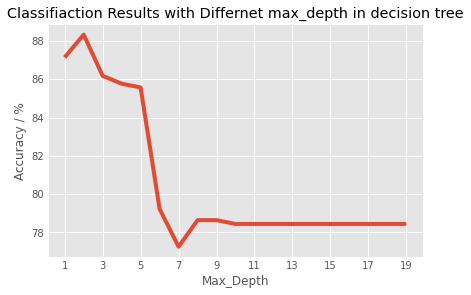

In [19]:
fig, ax = plt.subplots()
df_results_list_dt.set_index("Max_Depth")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet max_depth in decision tree")
ax.set_xticks(list(range(1,20,2)))
ax.set_ylabel("Accuracy / %")


Yim's Function

In [20]:
def clf_range(depth):
    clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_depth=depth))
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
    return accuracy_results.mean()
acc_results = [clf_range(x) for x in range (1,20)]

In [21]:
np.random.seed(48)
clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_leaf_nodes=3))
accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_leaf_node = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_leaf_node = 3:  87.14230246554067 %


In [23]:
import warnings
warnings.filterwarnings('ignore')
acc_leaf = []
for x in range(21):
    np.random.seed(48)
    clf_dt = make_pipeline( StandardScaler(), tree.DecisionTreeClassifier(max_leaf_nodes=x))
    accuracy_results = cross_val_score(clf_dt, X, y, cv=5, scoring = "accuracy")
    acc_leaf.append([x, 100 * np.mean(accuracy_results)])
    print(acc_leaf[x])

[0, nan]
[1, nan]
[2, 87.14230246554067]
[3, 87.14230246554067]
[4, 84.59522422830518]
[5, 85.96777324791303]
[6, 84.77965443603183]
[7, 85.17569403999224]
[8, 84.77965443603183]
[9, 82.00737720830907]
[10, 82.20345563968161]
[11, 83.589594253543]
[12, 83.98563385750339]
[13, 83.3915744515628]
[14, 83.3915744515628]
[15, 83.3915744515628]
[16, 84.7777130654242]
[17, 84.57969326344399]
[18, 84.7777130654242]
[19, 84.1836536594836]
[20, 84.1836536594836]


In [35]:
np.random.seed(48)
n_estimator = 100
depth = 3

In [36]:
clf_rf = ensemble.RandomForestClassifier(
    n_estimators= n_estimator,
    max_depth = depth)
accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  89.91457969326345 %


In [38]:
results_list = []
for n_estimator in range(5,55,5):
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
    print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")

Average Accuracy when max_depth = 3:  88.13240147544165 %
Average Accuracy when max_depth = 3:  87.93438167346146 %
Average Accuracy when max_depth = 3:  88.92448068336245 %
Average Accuracy when max_depth = 3:  88.52844107940206 %
Average Accuracy when max_depth = 3:  88.72646088138225 %
Average Accuracy when max_depth = 3:  89.71655989128324 %
Average Accuracy when max_depth = 3:  88.52844107940206 %
Average Accuracy when max_depth = 3:  89.51854008930304 %
Average Accuracy when max_depth = 3:  89.51854008930304 %
Average Accuracy when max_depth = 3:  89.71655989128324 %


Average Accuracy when max_depth = 3:  83.99145796932635 %
Average Accuracy when max_depth = 3:  84.77383032420889 %
Average Accuracy when max_depth = 3:  82.9877693651718 %
Average Accuracy when max_depth = 3:  83.185789167152 %
Average Accuracy when max_depth = 3:  82.39370995923122 %
Average Accuracy when max_depth = 3:  83.3838089691322 %
Average Accuracy when max_depth = 3:  84.5680450397981 %
Average Accuracy when max_depth = 3:  84.5680450397981 %
Average Accuracy when max_depth = 3:  84.37002523781788 %
Average Accuracy when max_depth = 3:  84.17200543583769 %


Text(0, 0.5, 'Accuracy / %')

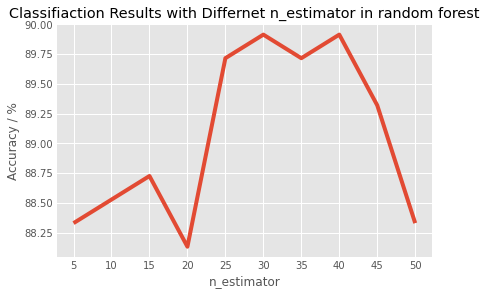

In [41]:
# Go through different n_estimator

results_list = []
for n_estimator in range(5,55,5):
    np.random.seed(100)
    depth = 3
    clf_adaboost = ensemble.AdaBoostClassifier(n_estimators = n_estimator,
                                                  base_estimator = tree.DecisionTreeClassifier(
                                                      max_depth= depth))
    accuracy_results = cross_val_score(clf_adaboost, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
    print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")
df_results_list_adaboost = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])
fig, ax = plt.subplots()
df_results_list_rf.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest")
ax.set_xticks(list(range(5,55,5)))
ax.set_ylabel("Accuracy / %")

Average Accuracy when max_depth = 3:  88.33042127742186 %
Average Accuracy when max_depth = 3:  88.52844107940206 %
Average Accuracy when max_depth = 3:  88.72646088138225 %
Average Accuracy when max_depth = 3:  88.13240147544165 %
Average Accuracy when max_depth = 3:  89.71655989128324 %
Average Accuracy when max_depth = 3:  89.91457969326345 %
Average Accuracy when max_depth = 3:  89.71655989128324 %
Average Accuracy when max_depth = 3:  89.91457969326345 %
Average Accuracy when max_depth = 3:  89.32052028732285 %
Average Accuracy when max_depth = 3:  88.33042127742186 %


Text(0, 0.5, 'Accuracy / %')

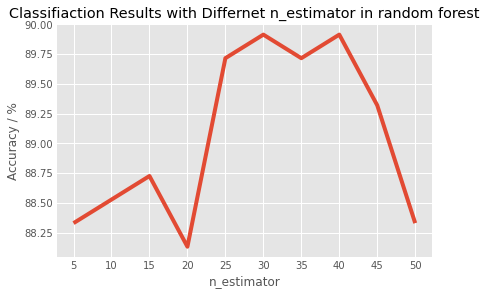

In [40]:
# Go through different n_estimator

results_list = []
for n_estimator in range(5,55,5):
    np.random.seed(100)
    depth = 3
    clf_rf = ensemble.RandomForestClassifier(
        n_estimators= n_estimator,
        max_depth = depth)
    accuracy_results = cross_val_score(clf_rf, X, y, cv=5, scoring = "accuracy")
    results_list.append([n_estimator, 100 * np.mean(accuracy_results)])
    print("Average Accuracy when max_depth = 3: ", 100 * np.mean(accuracy_results), "%")
df_results_list_rf = pd.DataFrame(results_list, columns=["n_estimator", "Acc"])
# Visualization

fig, ax = plt.subplots()
df_results_list_rf.set_index("n_estimator")["Acc"].plot(ax = ax)
ax.set_title("Classifiaction Results with Differnet n_estimator in random forest")
ax.set_xticks(list(range(5,55,5)))
ax.set_ylabel("Accuracy / %")
